# python libs for all vis things

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## [matplotlib](http://matplotlib.org/)

- interactive vis notes: http://matplotlib.org/users/navigation_toolbar.html

In [2]:
t = arange(0.0, 1.0, 0.01)

y1 = sin(2*pi*t)
y2 = sin(2*2*pi*t)

import pandas as pd

df = pd.DataFrame({'t': t, 'y1': y1, 'y2': y2})
df.head(10)

,t,y1,y2
0,0.00,0.000000,0.000000
1,0.01,0.062791,0.125333
2,0.02,0.125333,0.248690
3,0.03,0.187381,0.368125
4,0.04,0.248690,0.481754
5,0.05,0.309017,0.587785
6,0.06,0.368125,0.684547
7,0.07,0.425779,0.770513
8,0.08,0.481754,0.844328
9,0.09,0.535827,0.904827


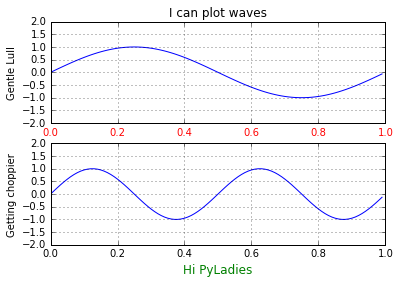

In [3]:
fig = figure(1)

ax1 = fig.add_subplot(211)
ax1.plot(t, y1)
ax1.grid(True)
ax1.set_ylim((-2, 2))
ax1.set_ylabel('Gentle Lull')
ax1.set_title('I can plot waves')

for label in ax1.get_xticklabels():
    label.set_color('r')


ax2 = fig.add_subplot(212)
ax2.plot(t, y2)
ax2.grid(True)
ax2.set_ylim((-2, 2))
ax2.set_ylabel('Getting choppier')
l = ax2.set_xlabel('Hi PyLadies')
l.set_color('g')
l.set_fontsize('large')

show()

### [+ seaborn](http://stanford.edu/~mwaskom/software/seaborn/)

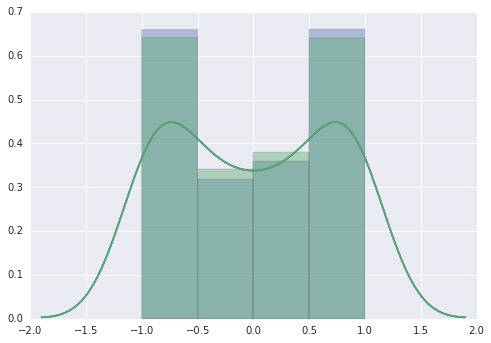

In [4]:
import seaborn as sns

sns.set(color_codes=True)
sns.distplot(y1)
sns.distplot(y2)

### [+ mpld3](http://mpld3.github.io/)

In [5]:
import matplotlib.pyplot as plt, mpld3
mpld3.enable_notebook()

N=10
data = pd.DataFrame({"x": np.random.randn(N),
                     "y": np.random.randn(N), 
                     "size": np.random.randint(20,200, size=N),
                     "label": np.arange(N)
                     })


scatter_sns = sns.lmplot("x", "y", 
           scatter_kws={"s": data["size"]},
           robust=False, # slow if true
           data=data, size=8)
fig = plt.gcf()

ax = plt.gca()
pts = ax.get_children()[3]
tooltip = mpld3.plugins.PointLabelTooltip(pts, labels=list(data.label))

mpld3.plugins.connect(fig, tooltip)

mpld3.display(fig)

## [ipywidgets](https://github.com/ipython/ipywidgets)
- helpful tutorial [here](http://blog.dominodatalab.com/interactive-dashboards-in-jupyter/)

<function __main__.pltsin>

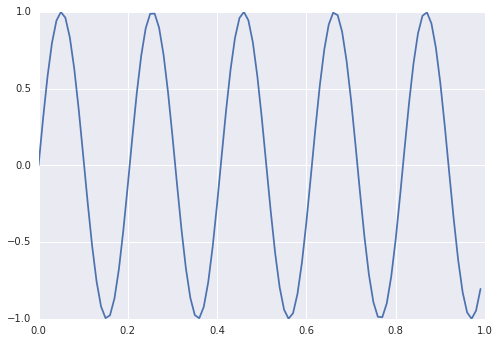

In [6]:
from ipywidgets import widgets
from IPython.html.widgets import *

t = arange(0.0, 1.0, 0.01)

def pltsin(f):
    plt.plot(t, sin(2*pi*t*f))
    
interact(pltsin, f=(1,10,0.1))

<function __main__.pltsin>

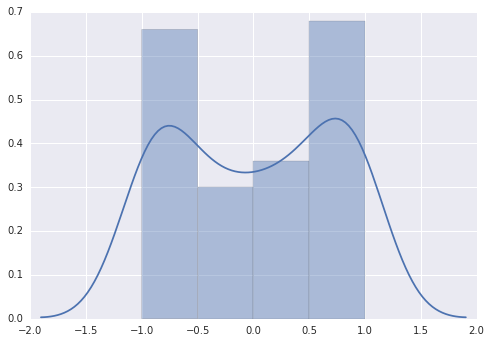

In [7]:
def pltsin(f):
    sns.distplot(sin(2*pi*t*f))
    
interact(pltsin, f=(1,10,0.1))

# Python + JS

## [bokeh](http://bokeh.pydata.org/en/latest/)

In [8]:
from bokeh.plotting import figure, output_notebook, show

# output inline with notebook
output_notebook()

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='t', y_axis_label='sin(2*pi*t)')

# add a line renderer with legend and line thickness
p.line(t, sin(2*pi*t), legend="Temp.", line_width=2)

# show the results
show(p)

BokehJS successfully loaded.

//anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
//anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
//anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
//anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
//anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:41: DeprecationWarning: Comm._topic_default is deprecated: use @default decorator instead.
  def _topic_default(self):
//anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: Depre

## [bokeh + ipywidgets](https://github.com/bokeh/bokeh/blob/master/examples/howto/notebook_comms/Jupyter%20Interactors.ipynb)

In [16]:
# this uses Bokeh for plotting + ipywidgets for widgets
# translation: no Bokeh server required

from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook
from bokeh.plotting import figure, show, output_notebook

x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

output_notebook()

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)

def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()
    
interact(update, f=["sin", "cos", "tan"], w=(0,100), A=(1,5), phi=(0, 20, 0.1))
show(p)

//anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
//anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
//anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
//anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
//anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:41: DeprecationWarning: Comm._topic_default is deprecated: use @default decorator instead.
  def _topic_default(self):
//anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: Depre

## [d3.js](https://d3js.org/)

#### example [here](http://adilmoujahid.com/posts/2015/01/interactive-data-visualization-d3-dc-python-mongodb/)

## others to check out
- [pyxley](https://github.com/stitchfix/pyxley): can we bring it all together?
- [folium](https://github.com/python-visualization/folium)
- [vispy](http://vispy.org/)
    - Hello World found [here](http://ipython-books.github.io/featured-06/)
- [prettyplotlib for matplotlib](http://blog.olgabotvinnik.com/prettyplotlib/)
- [pygal](http://www.pygal.org/en/latest/)
- [ggplot](https://github.com/yhat/ggplot)
- [plotly](https://plot.ly/)
- [pyqtgraph](http://www.pyqtgraph.org/)
- [toyplot](http://toyplot.readthedocs.org/en/stable/index.html)
- [glumpy](https://github.com/glumpy/glumpy)
- [networkx](https://github.com/networkx/networkx)
- [paper.js](http://paperjs.org
- [leaflet.js](http://leafletjs.com/)